<a href="https://colab.research.google.com/github/ishani2202/RiverClean/blob/main/DL_train_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import  Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')  # images from google drive
PATH="/content/drive/My Drive/dataset-resized/dataset-resized"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')
batch_size = 512
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

# base_model = tf.keras.applications.InceptionV3(include_top=False,
#     weights="imagenet",
#     input_shape=(150, 150, 3))
# base_model.trainable = False
# X = base_model.output
# X = Flatten(input_shape=base_model.output_shape[1:])(X)
# X = Dense(256, activation='relu')(X)
# X = Dropout(0.5)(X)
# Output = Dense(7, activation='softmax')(X)
# inception= Model(inputs=base_model.input, outputs=Output)

# inception.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#           optimizer=optimizers.Adam(lr = 0.001),
#           metrics=['accuracy'])

# history = inception.fit_generator(
#     train_data_gen,
#     epochs=epochs,
#     validation_data = val_data_gen)

# inception.save('/content/drive/My Drive/dataset-resized/training_inception_hdf5_format/trainedModel.h5')

 base_model = tf.keras.applications.ResNet50V2(include_top=False,
    weights="imagenet",
    input_shape=(150, 150, 3))    # pre-trained model,    loads weights pretrained on imagenet

# setup for resnet training from here

base_model.trainable = False
X = base_model.output
X = Flatten(input_shape=base_model.output_shape[1:])(X)
X = Dense(256, activation='relu')(X)  #Rectified Linear Units
X = Dropout(0.5)(X)
Output = Dense(7, activation='softmax')(X)
resnet= Model(inputs=base_model.input, outputs=Output)

resnet.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
          optimizer=optimizers.Adam(lr = 0.001),
          metrics=['accuracy'])

history = resnet.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data = val_data_gen)


resnet.save('/content/drive/My Drive/dataset-resized/training_resnet_hdf5_format/trainedModelRN.h5')
# resnet model saved


# testing
import numpy
for imagePath in  test_data_gen[0][0]:
  # print( str(imagePath))
  imagePath=np.expand_dims(imagePath,axis=0)
  prediction = resnet.predict(imagePath)
  print(numpy.argmax(prediction))
  # 0 = bio
  # 1 = cardboard
  # 2 = glass
  # 3 = metal
  # 4 = paper
  # 5 = plastic
  # 6 = trash

3
6
3
0
3
5
4
3
3
3


In [ ]:
drive.mount('/content/drive')  # images from google drive
PATH="/content/drive/My Drive/dataset-resized/dataset-resized"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')
batch_size = 512
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

import numpy
for imagePath in  test_data_gen[0][0]:
  # print( str(imagePath))
  imagePath=np.expand_dims(imagePath,axis=0)
  prediction = resnet.predict(imagePath)
  print(numpy.argmax(prediction))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 9553 images belonging to 7 classes.
Found 688 images belonging to 7 classes.
Found 10 images belonging to 1 classes.
6
6
6
6
6
6
6
6
6
2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH="/content/drive/My Drive/dataset-resized/dataset-resized"

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [ ]:
batch_size = 512
epochs = 10  #changed from 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 9554 images belonging to 7 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

# checkpoint_path = "/content/drive/My Drive/dataset-resized/training_inception/"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

Found 688 images belonging to 7 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 1 images belonging to 1 classes.


In [ ]:
# print(tf.__version__)
# print(tf.keras.__version__)
print(python.__version__)

NameError: ignored

In [ ]:
base_model = tf.keras.applications.InceptionV3(include_top=False,
    weights="imagenet",
    input_shape=(150, 150, 3))
base_model.trainable = False
X = base_model.output
X = Flatten(input_shape=base_model.output_shape[1:])(X)
X = Dense(256, activation='relu')(X)
X = Dropout(0.5)(X)
Output = Dense(7, activation='softmax')(X)
inception= Model(inputs=base_model.input, outputs=Output)

inception.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
          optimizer=optimizers.Adam(lr = 0.001),
          metrics=['accuracy'])

history = inception.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data = val_data_gen)





87916544/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
19/19 [==============================] - 2186s 114s/step - loss: 7.3665 - accuracy: 0.4078 - val_loss: 1.1547 - val_accuracy: 0.6003
Epoch 2/10
19/19 [==============================] - 466s 25s/step - loss: 1.1185 - accuracy: 0.5943 - val_loss: 0.9117 - val_accuracy: 0.6773
Epoch 3/10
19/19 [==============================] - 479s 25s/step - loss: 0.9609 - accuracy: 0.6480 - val_loss: 0.8424 - val_accuracy: 0.7267
Epoch 4/10
19/19 [==============================] - 464s 24s/step - loss: 0.8641 - accuracy: 0.6874 - val_loss: 0.7207 - val_accuracy: 0.7500
Epoch 5/10
19/19 [==============================] - 462s 25s/step - loss: 0.8019 - accuracy: 0.7136 - val_loss: 0.6582 - val_accuracy: 0.7674
Epoch 6/10
19/19 [==============================] - 469s 25s/step - loss: 0.7570 - accuracy: 0.7270 - val_loss: 0.5987 - val_accuracy: 0.7892
Epoch 7/10
19/19 [==============================] - 502s 27s/step - loss: 0.7033 - accuracy: 0.7462 - val_loss: 0.5768 - val_accuracy: 0.7994
Epoc

In [ ]:

# inception.save('/content/drive/My Drive/dataset-resized/training_inception/')
resnet = tf.keras.models.load_model('/content/drive/MyDrive/dataset-resized/training_resnet_hdf5_format/trainedModelRN.h5')
# resnet.summary()
InceptionNet = tf.keras.models.load_model('/content/drive/MyDrive/dataset-resized/training_inception_hdf5_format/trainedModel.h5')
# InceptionNet.summary()

In [ ]:
    from sklearn.metrics import classification_report, confusion_matrix
    resnet.confusion_matrix()

AttributeError: ignored

In [ ]:
inception.save('/content/drive/My Drive/dataset-resized/training_inception_hdf5_format/trainedModel.h5')

In [ ]:
checkpoint_path = "/content/drive/My Drive/dataset-resized/training_resnet/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
 base_model = tf.keras.applications.ResNet50V2(include_top=False,
    weights="imagenet",
    input_shape=(150, 150, 3))

base_model.trainable = False
X = base_model.output
X = Flatten(input_shape=base_model.output_shape[1:])(X)
X = Dense(256, activation='relu')(X)
X = Dropout(0.5)(X)
Output = Dense(7, activation='softmax')(X)
resnet= Model(inputs=base_model.input, outputs=Output)

resnet.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
          optimizer=optimizers.Adam(lr = 0.001),
          metrics=['accuracy'])

history = resnet.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data = val_data_gen)

resnet.save('/content/drive/My Drive/dataset-resized/training_resnet/')

resnet.save('/content/drive/My Drive/dataset-resized/training_resnet_hdf5_format/trainedModelRN.h5')

94674944/94668760 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
19/19 [==============================] - 1935s 100s/step - loss: 6.3487 - accuracy: 0.4894 - val_loss: 1.0390 - val_accuracy: 0.6119
Epoch 2/10
19/19 [==============================] - 729s 38s/step - loss: 1.0676 - accuracy: 0.6018 - val_loss: 0.7390 - val_accuracy: 0.7267
Epoch 3/10
19/19 [==============================] - 727s 38s/step - loss: 0.8258 - accuracy: 0.7000 - val_loss: 0.5585 - val_accuracy: 0.8110
Epoch 4/10
19/19 [==============================] - 726s 38s/step - loss: 0.6826 - accuracy: 0.7575 - val_loss: 0.4572 - val_accuracy: 0.8328
Epoch 5/10
19/19 [==============================] - 727s 38s/step - loss: 0.5968 - accuracy: 0.7795 - val_loss: 0.3928 - val_accuracy: 0.8547
Epoch 6/10
19/19 [==============================] - 725s 38s/step - loss: 0.5054 - accuracy: 0.8127 - val_loss: 0.3198 - val_accuracy: 0.8968
Epoch 7/10
19/19 [==============================] - 727s 38s/step - loss: 0.4526 - accuracy: 0.8308 - val_loss: 0.2643 - val_accuracy: 0.9215
Epoc

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)
print(tf.keras.__version__)

2.8.2
2.8.0


Text(0.5, 1.0, 'Training and Validation Accuracy')

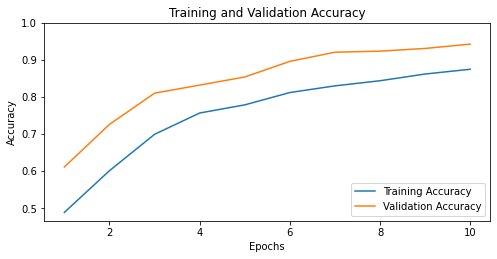

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,11)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(inception, to_file='model_plot.png', show_shapes=True, show_layer_names=False,expand_nested=False)

SyntaxError: ignored

In [ ]:
!pip install classify
import classify
import base64
import argparse
import operator
import warnings
# import RPi.GPIO as GPIO
import time
# import pygame
# import pygame.camera

In [ ]:
imagePath = '/content/drive/My Drive/dataset-resized/dataset-resized/test/trash137.jpg'
result = classify.analyse(imagePath)
val=max(result.items(), key=operator.itemgetter(1))[0]
print(val)

AttributeError: ignored

In [ ]:
#from gpiozero import Servo
import RPi.GPIO as GPIO
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense
import os
import numpy as np
PATH="/home/pi"
test_dir = os.path.join(PATH, 'test_img_store')
batch_size = 512
epochs = 10  #changed from 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
test_image_generator = ImageDataGenerator(rescale=1./255)
resnet = tf.keras.models.load_model('/home/pi/projects/training_resnet_hdf5_format/trainedModelRN.h5')
import pygame
import pygame.camera
width = 1920
height = 1080
pygame.init()
pygame.camera.init()
camlist = pygame.camera.list_cameras()
cam = pygame.camera.Camera(camlist[0],(width,height))

while true:
  cam.start()
  image = cam.get_image()
  time.sleep(2)
  cam.stop()
  pygame.image.save(image,'/home/pi/test_img_store/images_dir/image.jpg')
  test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, directory=test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='categorical')
  # imagePath = '/home/pi/test_img_store/images_dir/image.jpg'
  imagePath = test_data_gen[0][0][0]
  imagePath=np.expand_dims(imagePath,axis=0)
  prediction = resnet.predict(imagePath)
  # 0 = bio
  # 1 = cardboard
  # 2 = glass
  # 3 = metal
  # 4 = paper
  # 5 = plastic
  # 6 = trash
  if np.argmax(prediction)== 4 or np.argmax(prediction)== 1 or np.argmax(prediction)== 0:
    print('biodegradable')
    GPIO.setmode(GPIO.BCM)  # set up BCM GPIO numbering
    servo = 18
    GPIO.setup(servo, GPIO.OUT)
    p=GPIO.PWM(servo,50)
    p.start(7.5)
    time.sleep(1)
    p.ChangeDutyCycle(10.5) #right
    time.sleep(5)
    p.ChangeDutyCycle(7.5)    #center
    time.sleep(1)
  else:
    GPIO.setmode(GPIO.BCM)  # set up BCM GPIO numbering
    servo = 18
    GPIO.setup(servo, GPIO.OUT)
    p=GPIO.PWM(servo,50)
    p.start(7.5)    #center
    time.sleep(1)
    p.ChangeDutyCycle(4.5)  #left
    time.sleep(5)
    p.ChangeDutyCycle(7.5)    #center
    time.sleep(1)
    print('Non-biodegradable')

In [ ]:
tf.__version__


'2.8.0'

In [ ]:
#from gpiozero import Servo
import RPi.GPIO as GPIO
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense
import os
import numpy as np

PATH="/home/pi"
test_dir = os.path.join(PATH, 'test_img_store')

batch_size = 512
epochs = 10  #changed from 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

test_image_generator = ImageDataGenerator(rescale=1./255)


resnet = tf.keras.models.load_model('/home/pi/projects/training_resnet_hdf5_format/trainedModelRN.h5')



import pygame
import pygame.camera

width = 1920
height = 1080

pygame.init()
pygame.camera.init()
camlist = pygame.camera.list_cameras()
cam = pygame.camera.Camera(camlist[0],(width,height))

nn = int(1)
while true:
  cam.start()
  image = cam.get_image()
  time.sleep(2)
  cam.stop()
  pygame.image.save(image,'/home/pi/test_img_store/images_dir/image.jpg')
  test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, directory=test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='categorical')
  # imagePath = '/home/pi/test_img_store/images_dir/image.jpg'
  imagePath = test_data_gen[0][0][0]
  imagePath=np.expand_dims(imagePath,axis=0)
  prediction = resnet.predict(imagePath)
  #print(np.argmax(prediction))
  # 6 = trash
  # 5 = plastic
  # 0 = bio
  # 1 = cardboard
  # 4 = paper
  # 3 = metal
  # 2 = glass
  if np.argmax(prediction)== 4 or np.argmax(prediction)== 1 or np.argmax(prediction)== 0:
    print('biodegradable')
    GPIO.setmode(GPIO.BCM)  # set up BCM GPIO numbering
    servo = 18
    GPIO.setup(servo, GPIO.OUT)
    p=GPIO.PWM(servo,50)
    p.start(7.5)
    print(1)
    time.sleep(1)
    p.ChangeDutyCycle(10.5)
    time.sleep(5)
    p.ChangeDutyCycle(7.5)
    time.sleep(1)
  else:
    GPIO.setmode(GPIO.BCM)  # set up BCM GPIO numbering
    servo = 18
    GPIO.setup(servo, GPIO.OUT)
    p=GPIO.PWM(servo,50)
    p.start(7.5)

    print(0)
    time.sleep(1)
    p.ChangeDutyCycle(4.5)
    time.sleep(5)
    p.ChangeDutyCycle(7.5)
    time.sleep(1)
    print('Non-biodegradable')